## Performing Multivariate Analysis

### Implementing Cluster Analysis on Multiple Variables using Kmeans

### Focus:  Most used clustering algorithm - *Kmeans Clustering algorithm* 

##### This is a centroid-based algorithm that splits data into K number of clusters, usually predefined by the user. The goal is to minmize the variance of data points within their correspoding clusters.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [46]:
data = pd.read_csv('data/marketing_campaign.csv')
data = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds', 
             'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
data.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,635,88,546,172,88,88,3,8,10,4,7
1,11,1,6,2,1,6,2,1,1,2,5
2,426,49,127,111,21,42,1,8,2,10,4
3,11,4,20,10,3,5,2,2,0,4,6
4,173,43,118,46,27,15,5,5,3,6,5


In [47]:
data.isnull().sum()

MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
dtype: int64

In [48]:
data.dropna(inplace = True)
data.shape

(2240, 11)

##### Scaling the data using the StandardScaler class;

In [49]:
scaler  = StandardScaler()
data_scaled = scaler.fit_transform(data)

##### Build Kmeans model

In [50]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 1)
kmeans.fit(data_scaled)

KMeans(n_clusters=4, random_state=1)

##### Visualizing the Kmeans clusters using the *matplotlib*

In [51]:
label = kmeans.fit_predict(data_scaled)
marketing_data_test = data.copy()
marketing_data_test['label'] = label
marketing_data_test['label'] = marketing_data_test['label'].astype(str)

<Axes: xlabel='MntWines', ylabel='MntFruits'>

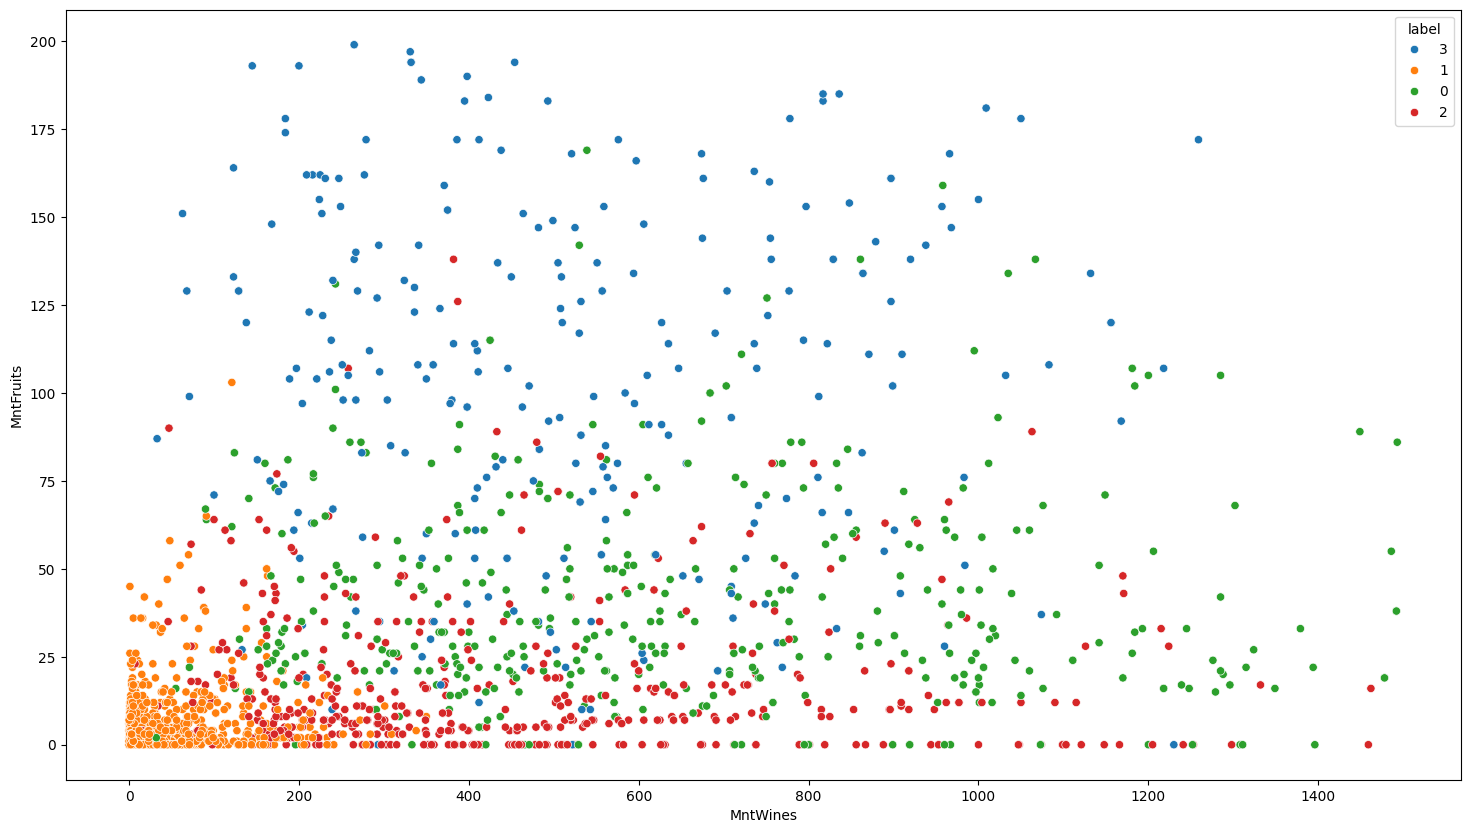

In [52]:
plt.figure(figsize= (18,10))
sns.scatterplot(x= marketing_data_test['MntWines'], y= marketing_data_test['MntFruits'], hue = marketing_data_test['label'])

### Choosing the optimal number of clusters in Kmeans


##### One of the major drawbacks of Kmeans clustering algorithm is the fact that the K number of clusters must be predefined by the user. One of the comomonly used techniques to solve this problem is the elbow method. It uses the *Within Cluster Sum of Squares(WCSS)*, also called intertia, to find the number of clusters.

In [53]:
data= data
data.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,635,88,546,172,88,88,3,8,10,4,7
1,11,1,6,2,1,6,2,1,1,2,5
2,426,49,127,111,21,42,1,8,2,10,4
3,11,4,20,10,3,5,2,2,0,4,6
4,173,43,118,46,27,15,5,5,3,6,5


In [54]:
data.shape

(2240, 11)

In [55]:
data = data[['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                                 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                                 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 
                                 'NumWebVisitsMonth']]
data.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,635,88,546,172,88,88,3,8,10,4,7
1,11,1,6,2,1,6,2,1,1,2,5
2,426,49,127,111,21,42,1,8,2,10,4
3,11,4,20,10,3,5,2,2,0,4,6
4,173,43,118,46,27,15,5,5,3,6,5


In [56]:
data.isnull().sum()

MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
dtype: int64

In [57]:
data.dropna(inplace = True)
data.shape

(2240, 11)

##### Scaling

In [58]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,635,88,546,172,88,88,3,8,10,4,7
1,11,1,6,2,1,6,2,1,1,2,5
2,426,49,127,111,21,42,1,8,2,10,4
3,11,4,20,10,3,5,2,2,0,4,6
4,173,43,118,46,27,15,5,5,3,6,5


##### Buildig the Model

In [59]:
kmenas = KMeans(n_clusters = 4, init = 'kmeans++', random_state = 1)
kmeans.fit(data_scaled)

KMeans(n_clusters=4, random_state=1)

##### Examine the Kmeans cluster output:

In [60]:
label = kmeans.fit_predict(data_scaled)
data_output = data.copy()
data_output['cluster'] = label
data_output['cluster'].value_counts()

cluster
1    1048
2     493
0     421
3     278
Name: count, dtype: int64

##### Using the elbow method to find optimal number of K clusters

Text(0.5, 1.0, 'Elbow Method for Optimal K')

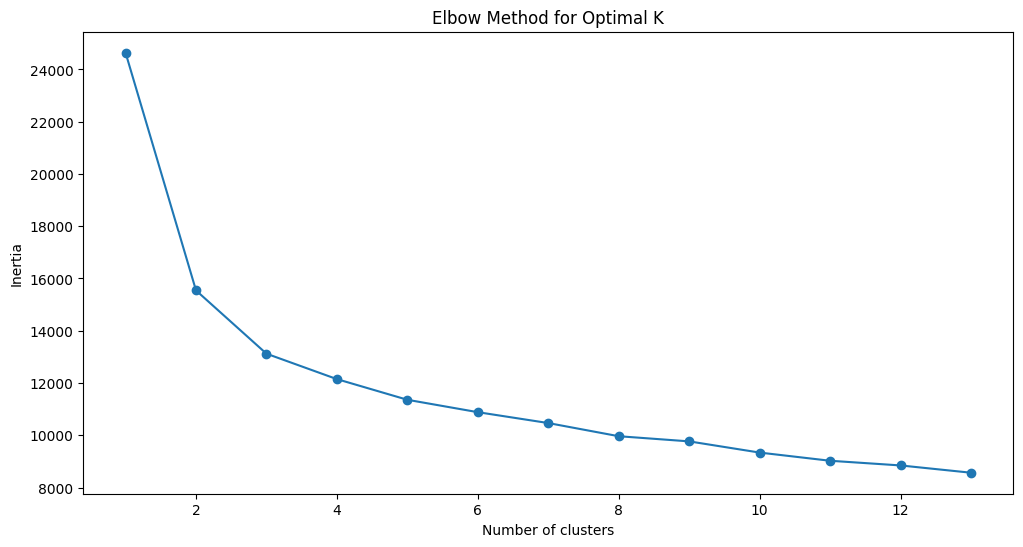

In [61]:
distance_values = []
for cluster in range(1,14):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    distance_values.append(kmeans.inertia_)

cluster_output = pd.DataFrame({'Cluster':range(1,14), 'distance_values':distance_values})
plt.figure(figsize=(12,6))
plt.plot(cluster_output['Cluster'], cluster_output['distance_values'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')

### Profiling Kmeans Clusters

##### Gives us a sense of what each cluster looks like. The approach to profiling for numerical fields is to find the mean of the numerical field per cluster. For categorical fields, we can find the percentage occurence of each category per cluster. 

In [62]:
data.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,635,88,546,172,88,88,3,8,10,4,7
1,11,1,6,2,1,6,2,1,1,2,5
2,426,49,127,111,21,42,1,8,2,10,4
3,11,4,20,10,3,5,2,2,0,4,6
4,173,43,118,46,27,15,5,5,3,6,5


##### Get the overall mean per variable to profile the clusters:

In [63]:
cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth']

In [64]:
overall_mean = data_output[cols].apply(np.mean).T
overall_mean = pd.DataFrame(overall_mean,columns =['overall_average'])
overall_mean

,overall_average
MntWines,303.935714
MntFruits,26.302232
MntMeatProducts,166.950000
MntFishProducts,37.525446
MntSweetProducts,27.062946
MntGoldProds,44.021875
NumDealsPurchases,2.325000
NumWebPurchases,4.084821
NumCatalogPurchases,2.662054
NumStorePurchases,5.790179


##### Mean per cluster variable

In [65]:
cluster_mean = data_output.groupby('cluster')[cols].mean().T
cluster_mean

cluster,0,1,2,3
MntWines,638.244656,43.962786,452.217039,514.744604
MntFruits,39.729216,5.224237,16.782961,102.309353
MntMeatProducts,416.928741,22.745229,120.651116,414.111511
MntFishProducts,71.420428,7.441794,22.632860,126.014388
MntSweetProducts,40.560570,5.287214,18.225152,104.384892
MntGoldProds,61.133017,15.206107,60.582150,97.370504
NumDealsPurchases,1.460808,1.903626,4.411765,1.521583
NumWebPurchases,5.004751,2.085878,6.553753,5.848921
NumCatalogPurchases,5.983373,0.581107,2.718053,5.377698
NumStorePurchases,8.581948,3.286260,7.271805,8.374101


##### Concatenate two datasets to get the final output

In [66]:
pd.concat([cluster_mean,overall_mean],axis =1)


,0,1,2,3,overall_average
MntWines,638.244656,43.962786,452.217039,514.744604,303.935714
MntFruits,39.729216,5.224237,16.782961,102.309353,26.302232
MntMeatProducts,416.928741,22.745229,120.651116,414.111511,166.950000
MntFishProducts,71.420428,7.441794,22.632860,126.014388,37.525446
MntSweetProducts,40.560570,5.287214,18.225152,104.384892,27.062946
MntGoldProds,61.133017,15.206107,60.582150,97.370504,44.021875
NumDealsPurchases,1.460808,1.903626,4.411765,1.521583,2.325000
NumWebPurchases,5.004751,2.085878,6.553753,5.848921,4.084821
NumCatalogPurchases,5.983373,0.581107,2.718053,5.377698,2.662054
NumStorePurchases,8.581948,3.286260,7.271805,8.374101,5.790179


### Implementing Principal Component Analysis on multiple variables. 

#### PCA is a popular dimensionality reduction method that is used to reduce the dimension of very large datasets. It does this by combining multiple variables into new variables called principal componenets. 

In [67]:
## Recall Marketing Data
data

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,635,88,546,172,88,88,3,8,10,4,7
1,11,1,6,2,1,6,2,1,1,2,5
2,426,49,127,111,21,42,1,8,2,10,4
3,11,4,20,10,3,5,2,2,0,4,6
4,173,43,118,46,27,15,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...
2235,709,43,182,42,118,247,2,9,3,4,5
2236,406,0,30,0,0,8,7,8,2,5,7
2237,908,48,217,32,12,24,1,2,3,13,6
2238,428,30,214,80,30,61,2,6,5,10,3


##### Scale the data

In [68]:
marketing_data = data
marketing_data

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,635,88,546,172,88,88,3,8,10,4,7
1,11,1,6,2,1,6,2,1,1,2,5
2,426,49,127,111,21,42,1,8,2,10,4
3,11,4,20,10,3,5,2,2,0,4,6
4,173,43,118,46,27,15,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...
2235,709,43,182,42,118,247,2,9,3,4,5
2236,406,0,30,0,0,8,7,8,2,5,7
2237,908,48,217,32,12,24,1,2,3,13,6
2238,428,30,214,80,30,61,2,6,5,10,3


In [69]:
x = marketing_data.values
marketing_data_scaled = StandardScaler().fit_transform(x)

##### Apply PCA to dataset using the PCA class.

In [70]:
from sklearn.decomposition import PCA


In [71]:
pca_marketing = PCA(n_components=6,random_state = 1)
principalComponents_marketing = pca_marketing.fit_transform(marketing_data_scaled)

In [72]:
principal_marketing_data = pd.DataFrame(data = principalComponents_marketing
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3','principal component 4'
                         ,'principal component 5','principal component 6'])
principal_marketing_data

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
0,3.800461,0.572973,-1.254630,1.083547,0.274886,-2.368660
1,-2.175610,-0.928702,0.117578,0.292224,0.323580,0.105413
2,1.501507,0.123894,-0.096791,-0.992810,-1.071276,0.602728
3,-2.016701,-0.518668,-0.025703,0.070743,-0.181590,0.227872
4,-0.044173,0.763401,-0.238572,1.149119,-0.334696,0.495866
...,...,...,...,...,...,...
2235,2.660651,1.308848,-2.151732,-2.178308,1.453732,-0.526411
2236,-1.063664,2.738997,0.463307,0.821222,-0.336517,0.070777
2237,1.130411,0.004491,1.519866,-0.539346,-0.947537,0.493189
2238,1.749883,0.079894,0.509966,-0.305776,-0.035570,0.746510


### Choosing Number of Principal Component Analysis. 

#### We can use a scree plot to get a sense of the most useful components

In [73]:
data.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,635,88,546,172,88,88,3,8,10,4,7
1,11,1,6,2,1,6,2,1,1,2,5
2,426,49,127,111,21,42,1,8,2,10,4
3,11,4,20,10,3,5,2,2,0,4,6
4,173,43,118,46,27,15,5,5,3,6,5


In [74]:
data.dtypes

MntWines               int64
MntFruits              int64
MntMeatProducts        int64
MntFishProducts        int64
MntSweetProducts       int64
MntGoldProds           int64
NumDealsPurchases      int64
NumWebPurchases        int64
NumCatalogPurchases    int64
NumStorePurchases      int64
NumWebVisitsMonth      int64
dtype: object

In [75]:
data.isnull().sum()

MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
dtype: int64

In [76]:
x = marketing_data.values
marketing_data_sclaed = StandardScaler().fit_transform(x)


In [77]:
pca_marketing = PCA(n_components = 6, random_state = 1)
principalComponents_marketing = pca_marketing.fit_transform(marketing_data_scaled)

##### Check for explained variance for each component:

In [78]:
for i in range(0, len(pca_marketing.explained_variance_ratio_)):
    print("Component ", i, "", pca_marketing.explained_variance_ratio_[i])

Component  0  0.4645665284363645
Component  1  0.1405246545704047
Component  2  0.07516844380951311
Component  3  0.06144172878159476
Component  4  0.057146317009475756
Component  5  0.04743640914940625


##### Create a scree plot to check the number of optimal components.

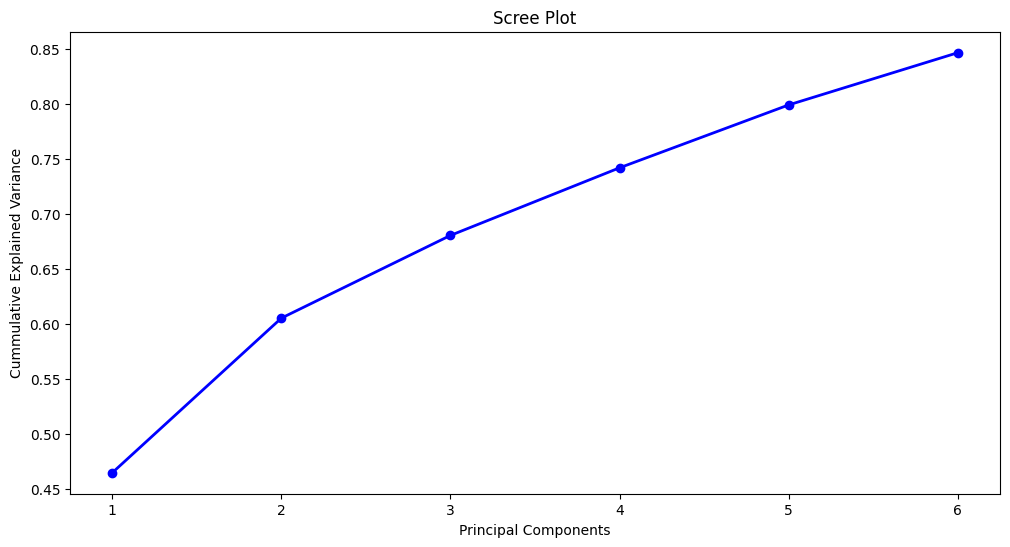

In [79]:
plt.figure(figsize= (12,6))

PC_values = np.arange(pca_marketing.n_components_) + 1
cummulative_variance = np.cumsum(pca_marketing.explained_variance_ratio_)
plt.plot(PC_values, cummulative_variance, 'o-', linewidth = 2, color = 'blue')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Cummulative Explained Variance')
plt.show()

### Analyzing principal components

##### Principal Components are constructed as linear combinations of original variables, which makes them less interpretable and devoid on inherent meaning. To determine the meaning of componets we analyze the reltionship between the original varibales and the principal components. 

##### Extract the loadings and Examine; (cont. from PCA application.)

In [80]:
x = marketing_data.values
marketing_data_sclaed = StandardScaler().fit_transform(x)


In [81]:
pca_marketing = PCA(n_components = 6, random_state = 1)
principalComponents_marketing = pca_marketing.fit_transform(marketing_data_scaled)

In [82]:
data

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,635,88,546,172,88,88,3,8,10,4,7
1,11,1,6,2,1,6,2,1,1,2,5
2,426,49,127,111,21,42,1,8,2,10,4
3,11,4,20,10,3,5,2,2,0,4,6
4,173,43,118,46,27,15,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...
2235,709,43,182,42,118,247,2,9,3,4,5
2236,406,0,30,0,0,8,7,8,2,5,7
2237,908,48,217,32,12,24,1,2,3,13,6
2238,428,30,214,80,30,61,2,6,5,10,3


In [83]:
loadings_df = pd.DataFrame(pca_marketing.components_).T
loadings_df = loadings_df.set_index(marketing_data.columns)
loadings_df

,0,1,2,3,4,5
MntWines,0.327941,0.222837,0.435535,-0.208662,-0.087749,-0.243052
MntFruits,0.323026,-0.130151,-0.376355,0.140996,-0.224386,0.012065
MntMeatProducts,0.354452,-0.130388,0.209744,0.305524,0.151587,-0.354552
MntFishProducts,0.333163,-0.142444,-0.345355,0.150907,-0.049328,-0.050934
MntSweetProducts,0.321179,-0.104676,-0.363038,0.115690,-0.350306,-0.047819
MntGoldProds,0.265813,0.189065,-0.405995,-0.416516,0.693513,0.128306
NumDealsPurchases,-0.042299,0.636331,-0.077169,0.661013,0.144609,0.268801
NumWebPurchases,0.245131,0.493262,-0.039387,-0.358028,-0.270322,-0.161445
NumCatalogPurchases,0.360813,0.009298,0.269517,0.235563,0.316932,-0.252435
NumStorePurchases,0.329634,0.187143,0.241080,-0.112152,-0.297203,0.574865


##### Filter out loadings below a specific threshhold

In [84]:
loadings_df.where(abs(loadings_df) >= 0.35)

,0,1,2,3,4,5
MntWines,NaN,NaN,0.435535,NaN,NaN,NaN
MntFruits,NaN,NaN,-0.376355,NaN,NaN,NaN
MntMeatProducts,0.354452,NaN,NaN,NaN,NaN,-0.354552
MntFishProducts,NaN,NaN,NaN,NaN,NaN,NaN
MntSweetProducts,NaN,NaN,-0.363038,NaN,-0.350306,NaN
MntGoldProds,NaN,NaN,-0.405995,-0.416516,0.693513,NaN
NumDealsPurchases,NaN,0.636331,NaN,0.661013,NaN,NaN
NumWebPurchases,NaN,0.493262,NaN,-0.358028,NaN,NaN
NumCatalogPurchases,0.360813,NaN,NaN,NaN,NaN,NaN
NumStorePurchases,NaN,NaN,NaN,NaN,NaN,0.574865


### Factor Analysis


##### Can be used for dimensionality reduction, condensing multiple variables into smaller set of variables called factors that are easier to analyze and understand.

In [85]:
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

In [86]:
data = pd.read_csv('website_survey.csv')
data = data[['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q6', 'q7', 'q8', 'q9', 'q10', 
             'q11', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 
             'q21', 'q23', 'q24', 'q25', 'q26']]
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'website_survey.csv'

In [ ]:
satisfaction_data = data

In [ ]:
satisfaction_data


In [ ]:
satisfaction_data.isnull().sum()

##### Check for multicollinearity

In [ ]:
satisfaction_data.corr()[(satisfaction_data.corr() > 0.9) & (satisfaction_data.corr() < 1)]

##### Test the suitability of the dataset using the Factor Analyzer

In [ ]:
kmo_all, kmo_model = calculate_kmo(satisfaction_data)
kmo_model

In [ ]:
FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

##### Check loadings 

In [ ]:
loadings_output = pd.DataFrame(fa.loadings_, index = satisfaction_data.columns)
loadings_output


### Determining the number of factors

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

In [ ]:
satisfaction_data = pd.read_csv("website_survey.csv")
satisfaction_data = satisfaction_data[['q1', 'q2', 'q3','q4', 'q5', 'q6', 'q7', 'q8', 
                                       'q9', 'q10', 'q11', 'q12', 'q13', 'q14','q15', 'q16', 'q17', 
                                       'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24','q25', 'q26']]


In [ ]:
satisfaction_data = data

In [ ]:
satisfaction_data.shape


In [ ]:
satisfaction_data.dtypes


##### Check for Multicollinearity


In [ ]:

satisfaction_data.corr()


In [ ]:
satisfaction_data.corr()[(satisfaction_data.corr()>0.8) & (satisfaction_data.corr()<1)]


##### Applying factor Analysis

In [ ]:
FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [ ]:
# Get variance of each factors
from factor_analyzer import FactorAnalyzer
import pandas as pd



In [ ]:
from factor_analyzer import FactorAnalyzer
import pandas as pd

pd.DataFrame(fa.get_factor_variance(),
             index=['Variance','Proportional Var','Cumulative Var'])

##### Create  scree plot

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Remove features with near-zero variance
selector = VarianceThreshold(threshold=0.01)  # Threshold can be adjusted
filtered_data = selector.fit_transform(satisfaction_data)

print("Original shape:", satisfaction_data.shape)
print("Filtered shape:", filtered_data.shape)


In [ ]:
print(satisfaction_data.isnull().sum())

# Fill missing values (choose one)
satisfaction_data = satisfaction_data.fillna(satisfaction_data.mean())  # Fill with mean
# OR
satisfaction_data = satisfaction_data.dropna()  # Drop rows with missing values


##### Analyzing Factors

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

In [ ]:
satisfaction_data = pd.read_csv("website_survey.csv")


In [ ]:
satisfaction_data = satisfaction_data[['q1', 'q2', 'q3','q4', 'q5', 'q6', 'q7', 'q8', 'q9', 
                                       'q10', 'q11', 'q12', 'q13', 'q14','q15', 'q16', 'q17', 
                                       'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24','q25', 'q26']]

In [ ]:
satisfaction_data.head()


In [ ]:
satisfaction_data.shape


In [ ]:
satisfaction_data.dtypes


##### Check for multicollinearity

In [ ]:
satisfaction_data.corr()


In [ ]:
satisfaction_data.corr()[(satisfaction_data.corr()>0.9) & (satisfaction_data.corr()<1)]


##### Apply Factor Analysis to dataset


In [ ]:
fa = FactorAnalyzer(n_factors = 5, rotation="varimax")
fa.fit(satisfaction_data)

##### Analyze the factors

In [ ]:
loadings_output = pd.DataFrame(fa.loadings_,index=satisfaction_data.columns)
loadings_output

In [ ]:
loadings_output.where(abs(loadings_output) > 0.5)


In [ ]:
pd.DataFrame(fa.get_communalities(),index=satisfaction_data.columns,columns=['Communalities'])
